In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Artificial Intelligence and Machine Learning/Week5/FruitinAmazon.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [8]:
# data.data.districts
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [9]:
# Create data generators
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/FruitinAmazon/train',
    labels='inferred',
    label_mode='int',
    batch_size=128,
    image_size=(256, 256),
    validation_split=0.2,
    subset='training',
    seed=123
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/FruitinAmazon/train',
    labels='inferred',
    label_mode='int',
    batch_size=128,
    image_size=(256, 256),
    validation_split=0.2,
    subset='validation',
    seed=123
)

test_ds = keras.utils.image_dataset_from_directory(
    directory='/content/FruitinAmazon/test',
    labels='inferred',
    label_mode='int',
    batch_size=128,
    image_size=(256, 256)
)

Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.
Found 30 files belonging to 6 classes.


In [10]:
# Display class names
class_names = train_ds.class_names
print("Class names:", class_names)

Class names: ['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']


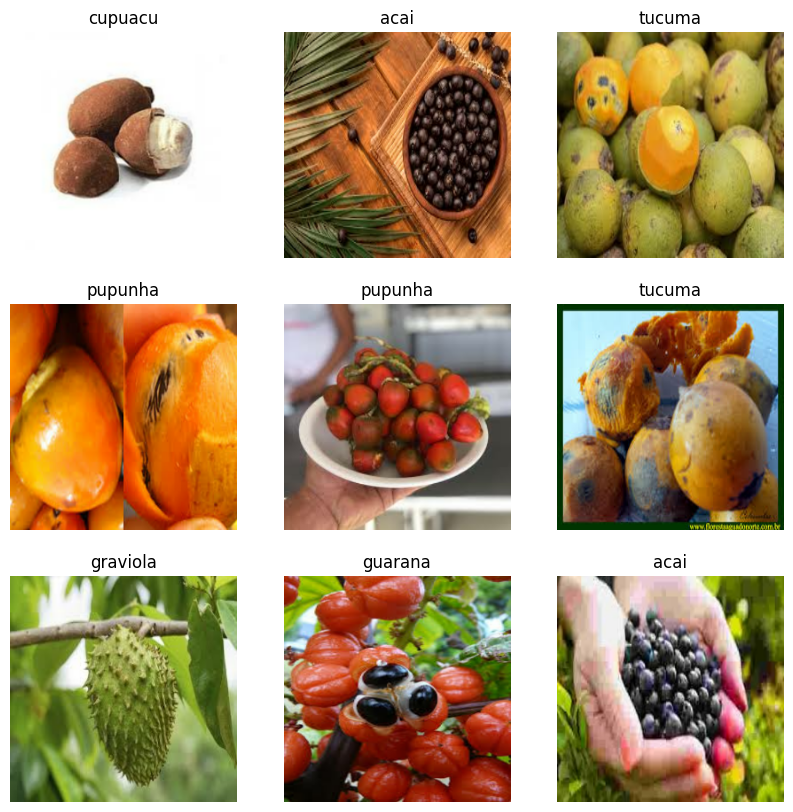

In [11]:
# Visualize some images
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

#Task 1: Data Understanding and Visualization:

In [12]:
train_ds.class_names


['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']

In [13]:
# {image, lablels} =  train_ds.take(1)

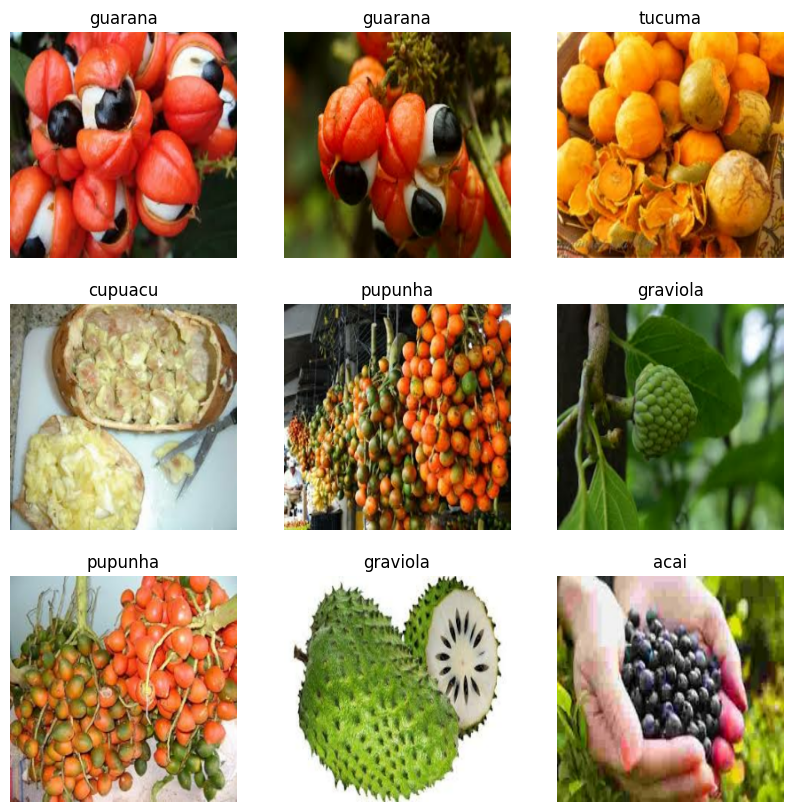

In [14]:
# Visualize some images
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

#Task 2: Loading and Preprocessing Image Data in keras:

In [15]:
# Data preprocessing
def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

In [16]:
train_ds = train_ds.map(preprocess).prefetch(tf.data.AUTOTUNE)
validation_ds = validation_ds.map(preprocess).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.map(preprocess).prefetch(tf.data.AUTOTUNE)

#Task 3 - Implement a CNN with

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [18]:
num_classes = 6
input_shape = (256, 256, 3)

In [19]:
model = Sequential([
        # Convolutional Layer 1
        layers.Conv2D(
            filters=32,
            kernel_size=(3, 3),
            padding='same',
            strides=1,
            input_shape=input_shape
        ),
        layers.Activation('relu'),

        # Pooling Layer 1
        layers.MaxPooling2D(
            pool_size=(2, 2),
            strides=2
        ),

        # Convolutional Layer 2
        layers.Conv2D(
            filters=32,
            kernel_size=(3, 3),
            padding='same',
            strides=1
        ),
        layers.Activation('relu'),

        # Pooling Layer 2
        layers.MaxPooling2D(
            pool_size=(2, 2),
            strides=2
        ),

        # Flatten Layer
        layers.Flatten(),

        # Fully Connected Layers
        layers.Dense(64, activation='relu'),
        layers.Dense(128, activation='relu'),

        # Dropout for regularization
        layers.Dropout(0.5),

        # Output Layer
        layers.Dense(num_classes, activation='softmax')
    ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#Task 4: Compile the Model

In [20]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 256, 256, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 131072)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       8,388,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,407,910 (32.07 MB)

 Trainable params: 8,407,910 (32.07 MB)

 Non-trainable params: 0 (0.00 B)

#Task 4: Train the Model

In [22]:
# Train the model
history = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=20
)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 0.1667 - loss: 1.8240 - val_accuracy: 0.1111 - val_loss: 5.3254
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - accuracy: 0.2361 - loss: 5.3786 - val_accuracy: 0.1667 - val_loss: 2.7151
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - accuracy: 0.1944 - loss: 2.7628 - val_accuracy: 0.1111 - val_loss: 3.1498
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - accuracy: 0.1389 - loss: 3.0852 - val_accuracy: 0.1111 - val_loss: 2.2955
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step - accuracy: 0.3194 - loss: 1.9122 - val_accuracy: 0.0556 - val_loss: 2.0895
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 0.2639 - loss: 1.8505 - val_accuracy: 0.0556 - val_loss: 1.8867
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step - accuracy: 0.3056 - loss: 1.7466 - val_accuracy: 0.1111 - val_loss: 1.8042
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step - accuracy: 0.3611 - loss: 1.6901 - val_accuracy: 0.1667 - val_loss: 

#Task 5: Evaluate the Model

In [23]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test accuracy: {test_acc:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6000 - loss: 1.2748
Test accuracy: 0.6000


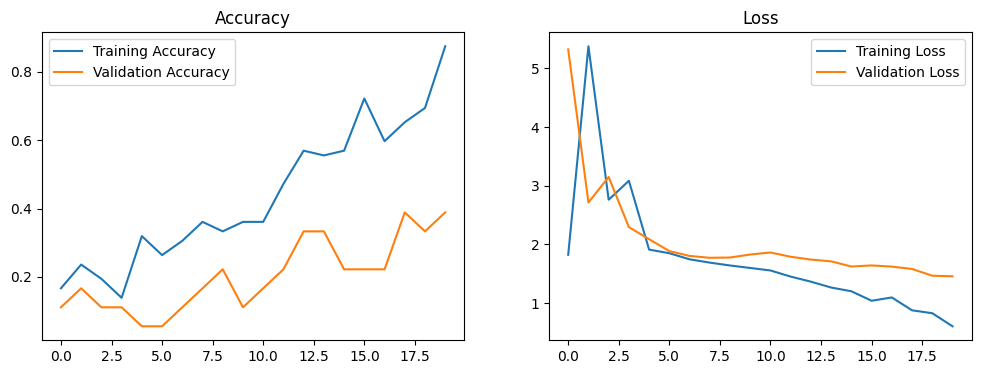

In [24]:
# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


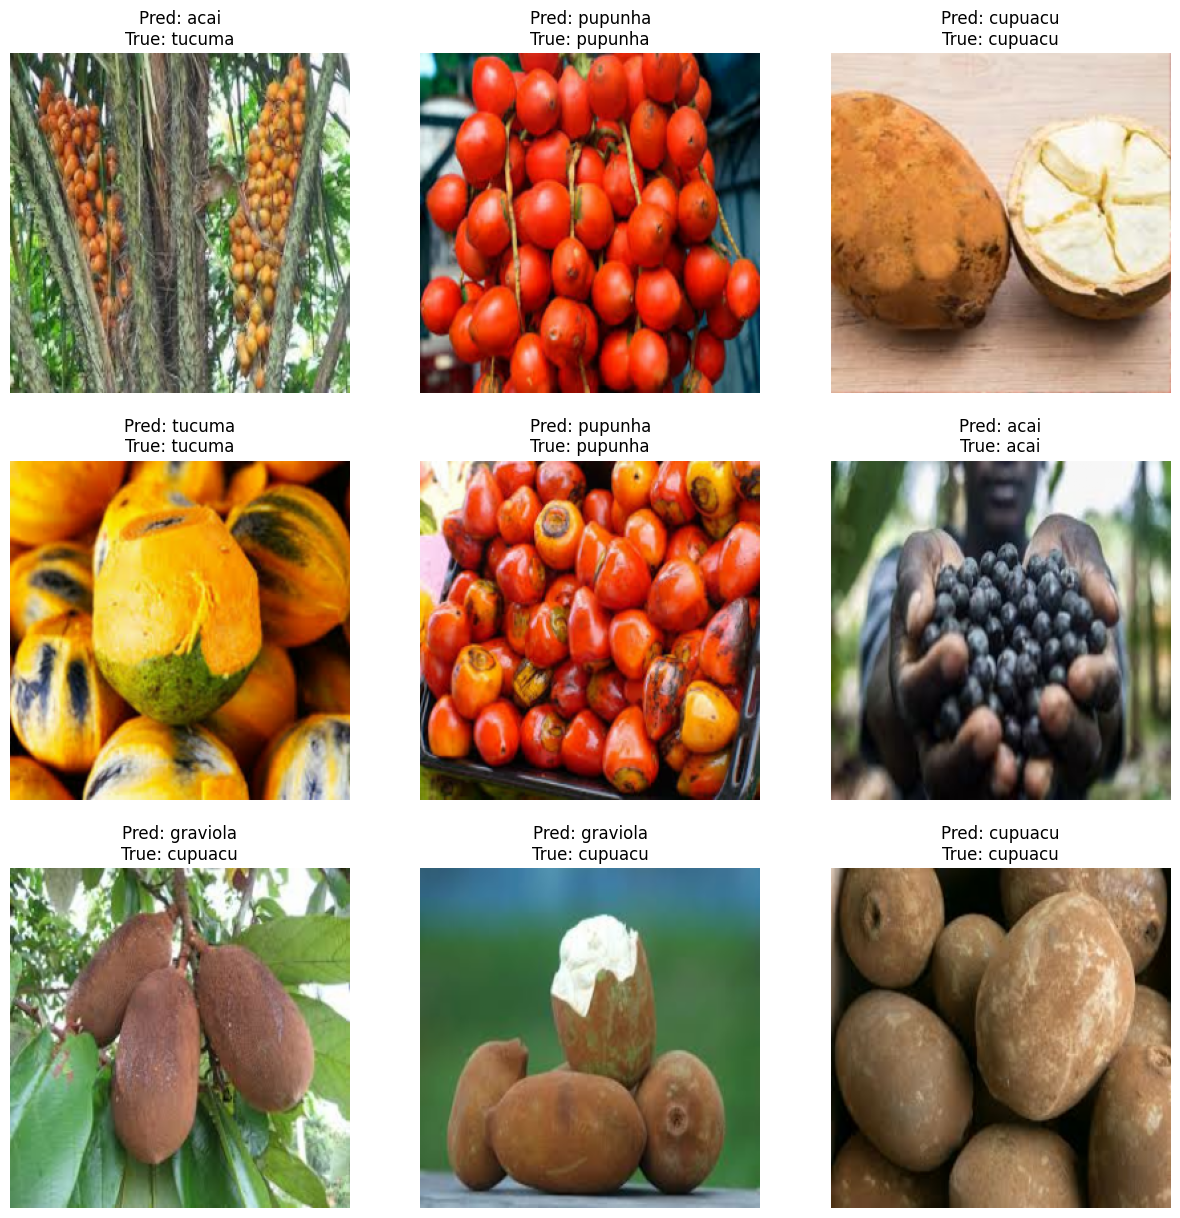

In [25]:
# Make predictions on test set
import numpy as np

plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    predictions = model.predict(images)
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())
        predicted_label = np.argmax(predictions[i])
        true_label = labels[i]
        plt.title(f"Pred: {class_names[predicted_label]}\nTrue: {class_names[true_label]}")
        plt.axis("off")
plt.show()

#Task 6: Save and Load the Model

In [26]:
# Save the trained model
model.save("trained_model.h5")
print("Model saved successfully.")


Model saved successfully.


In [27]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model("trained_model.h5")
print("Model loaded successfully.")

# Re-evaluate the model on the test dataset
test_loss, test_accuracy = loaded_model.evaluate(test_ds, verbose=1)

print(f"Re-evaluated Test Accuracy: {test_accuracy:.4f}")
print(f"Re-evaluated Test Loss: {test_loss:.4f}")


Model loaded successfully.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step - accuracy: 0.6000 - loss: 1.2748
Re-evaluated Test Accuracy: 0.6000
Re-evaluated Test Loss: 1.2748


#Task 7: Predictions and Classification Report

In [28]:
import numpy as np
from sklearn.metrics import classification_report

# Get predictions
y_pred_probs = loaded_model.predict(test_ds)  # Predicted probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

# Get true labels
y_true = np.concatenate([y for x, y in test_ds], axis=0)  # Extract true labels from dataset

# Generate Classification Report
print("Classification Report:\n", classification_report(y_true, y_pred))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.11      0.20      0.14         5
           1       0.40      0.40      0.40         5
           2       0.14      0.20      0.17         5
           3       0.00      0.00      0.00         5
           4       0.17      0.20      0.18         5
           5       0.00      0.00      0.00         5

    accuracy                           0.17        30
   macro avg       0.14      0.17      0.15        30
weighted avg       0.14      0.17      0.15        30

